                        EXPLORATORY DATA ANALYSIS ON THE WINE DATASET 
                                        **REPORT**

INTRODUCTION

Wine dataset is a wine reviews dataset with 1,103 entries.
Columns cover geography, wine type, winery, price and expert rating.

The objective of this analysis is to explore characteristics, relationships between features, and insights about wine quality or classification.


In [1]:
# Import data anlysis modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [2]:
# Load dataset
df_wine = pd.read_csv('wine.csv')
# Preview data
df_wine.head(7)


,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selecci√≥n Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodr√≠guez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La B√©gude, named af...",La Br√ªlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la B√©gude
5,5,Spain,"Deep, dense and pure from the opening bell, th...",Numanthia,95,73.0,Northern Spain,Toro,NaN,Tinta de Toro,Numanthia
6,6,Spain,Slightly gritty black-fruit aromas include a s...,San Rom√°n,95,65.0,Northern Spain,Toro,NaN,Tinta de Toro,Maurodos


In [3]:
# Dataset Overview
df_wine.shape

(1103, 11)

In [4]:
# Data types
df_wine.dtypes

Unnamed: 0       int64
country         object
description     object
designation     object
points           int64
price          float64
province        object
region_1        object
region_2        object
variety         object
winery          object
dtype: object

Dataset Overview: 

- Shape: 
    1,103 rows and 11 columns 
- Columns:
    - country, province, region_1, region_2 - geography
    - designation, winery, variety, description - wine details
    - points - wine rating score
    - price - wine price
    - Unnamed: 0 - looks like an index column (no specific information, better drop at the cleaning stage)
- Data Types:
    - Numerical: points(int) and price(float)
    - Categorical: all others
    - Text: description


DATA CLEANING

- Drop column 'Unnamed'
- Check ranges/outliers


In [5]:
# Drop column 'Unnamed'
df_wine = df_wine.drop(columns=['Unnamed: 0'])
df_wine.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selecci√≥n Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodr√≠guez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La B√©gude, named af...",La Br√ªlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la B√©gude


In [6]:
#  Check data ranges/outliers
df_wine.describe()


,points,price
count,1103.000000,1046.000000
mean,89.701723,40.242830
std,2.390405,32.588141
min,85.000000,7.000000
25%,88.000000,20.000000
50%,90.000000,31.000000
75%,91.000000,50.000000
max,96.000000,500.000000


Basic stats interpretation: 

Points:
- average point is 90.
- std is 2.4, points do not range wide, they are quite close to each other.
- most wines are rated between 88 and 91 points, a narrow range, typical in wine expert reviews.

Price: 
- there are 57 missing prices (we will deal with them later in the Missing Data part)
- average price per bottle is $40
- std is 33 which is an extended range for wine prices
- price range is quite broad, worth looking for outliers 

Next step - visualisations:
- Histograms for distributions.
- Boxplots for outliers.


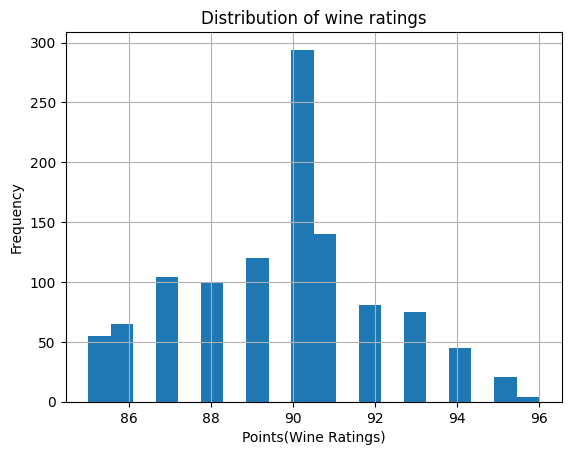

In [7]:
# Histograms to look at points and price and compare to the basic stats (above)
# Points distribution 
df_wine['points'].hist(bins=20)
plt.xlabel('Points(Wine Ratings)')
plt.ylabel('Frequency')
plt.title('Distribution of wine ratings')
plt.show()


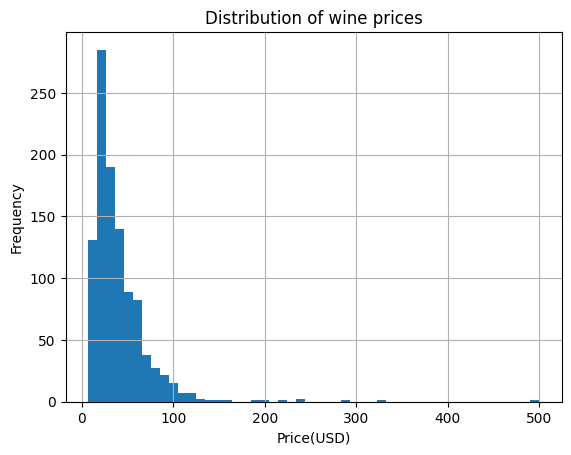

In [8]:

# Price distribution 
df_wine['price'].hist(bins=50)
plt.xlabel('Price(USD)')
plt.ylabel('Frequency')
plt.title('Distribution of wine prices')
plt.show()

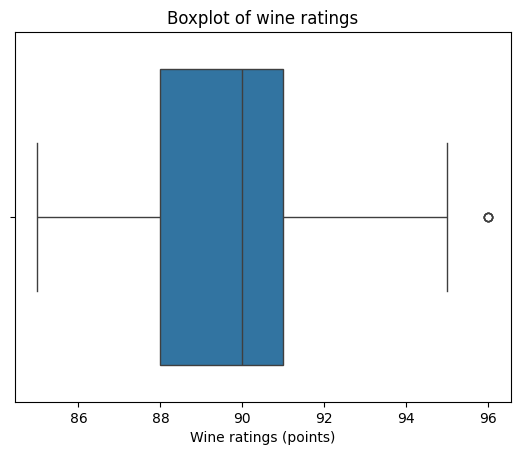

In [9]:
# Let us now look at outliers
sns.boxplot(x=df_wine['points'])
plt.xlabel ('Wine ratings (points)')
plt.title ('Boxplot of wine ratings')
plt.show()

The Points Boxplot illustrates a high score consistent rating range with just one outlier of 96 points. 

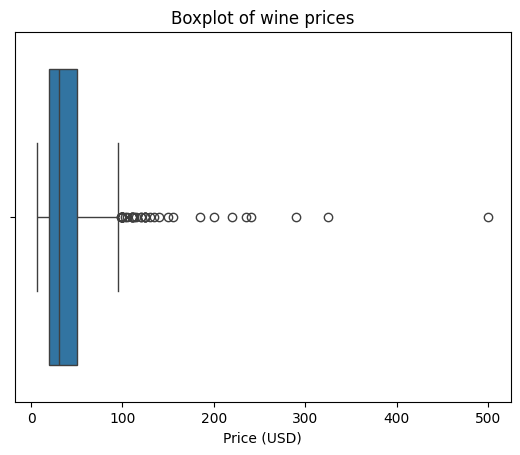

In [10]:
sns.boxplot(x=df_wine['price'])
plt.xlabel ('Price (USD)')
plt.title ('Boxplot of wine prices')
plt.show()

The Price Boxplot illustrates some wine price outliers for prices above USD100 with an extreme outlier for price of USD500. 

In [ ]:
MISSING DATA 

In [11]:
# Missing Data
df_wine.isnull().sum()

country          0
description      0
designation    269
points           0
price           57
province         0
region_1       173
region_2       611
variety          0
winery           0
dtype: int64

Missing Data: 
- designation: 269 missing (24%)
- price: 57 missing (5%)
- region_1: 173 missing (16%)
- region_2: 611 missing (55%) - too much data missing in region_2, the data in this column is not critical for the analysis.
 We will  drop this column.
  

<function matplotlib.pyplot.show(close=None, block=None)>

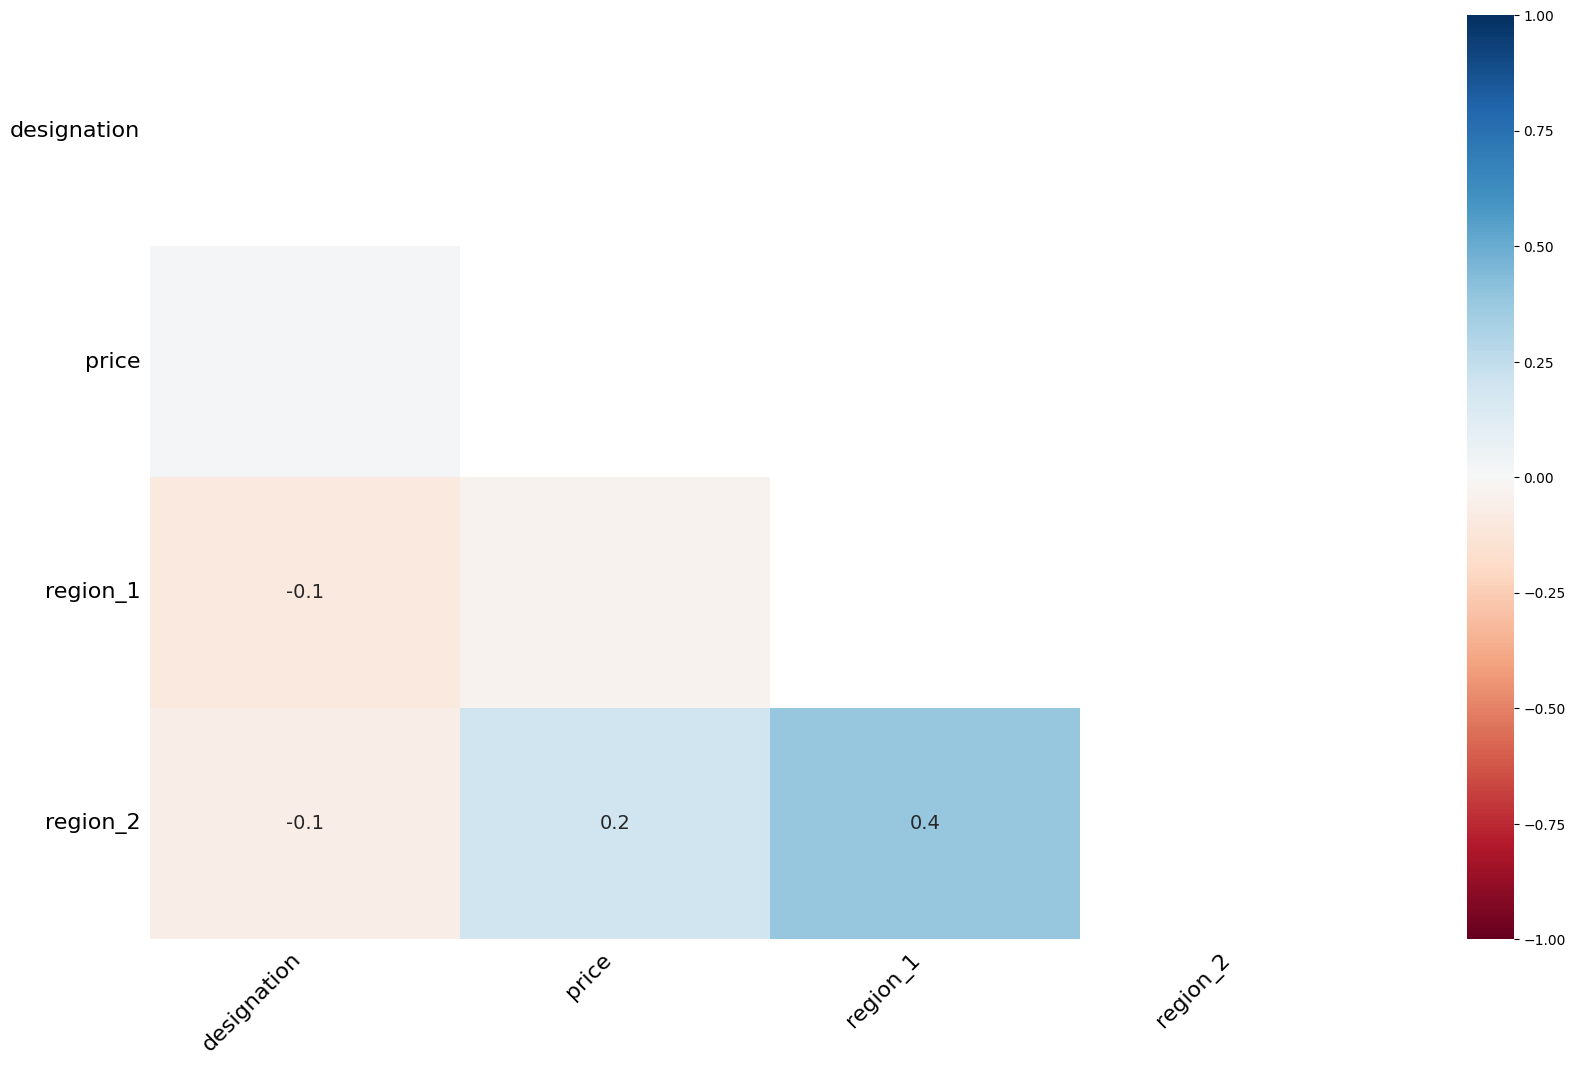

In [12]:
# Heatmap of missing values
msno.heatmap(df_wine)
plt.show

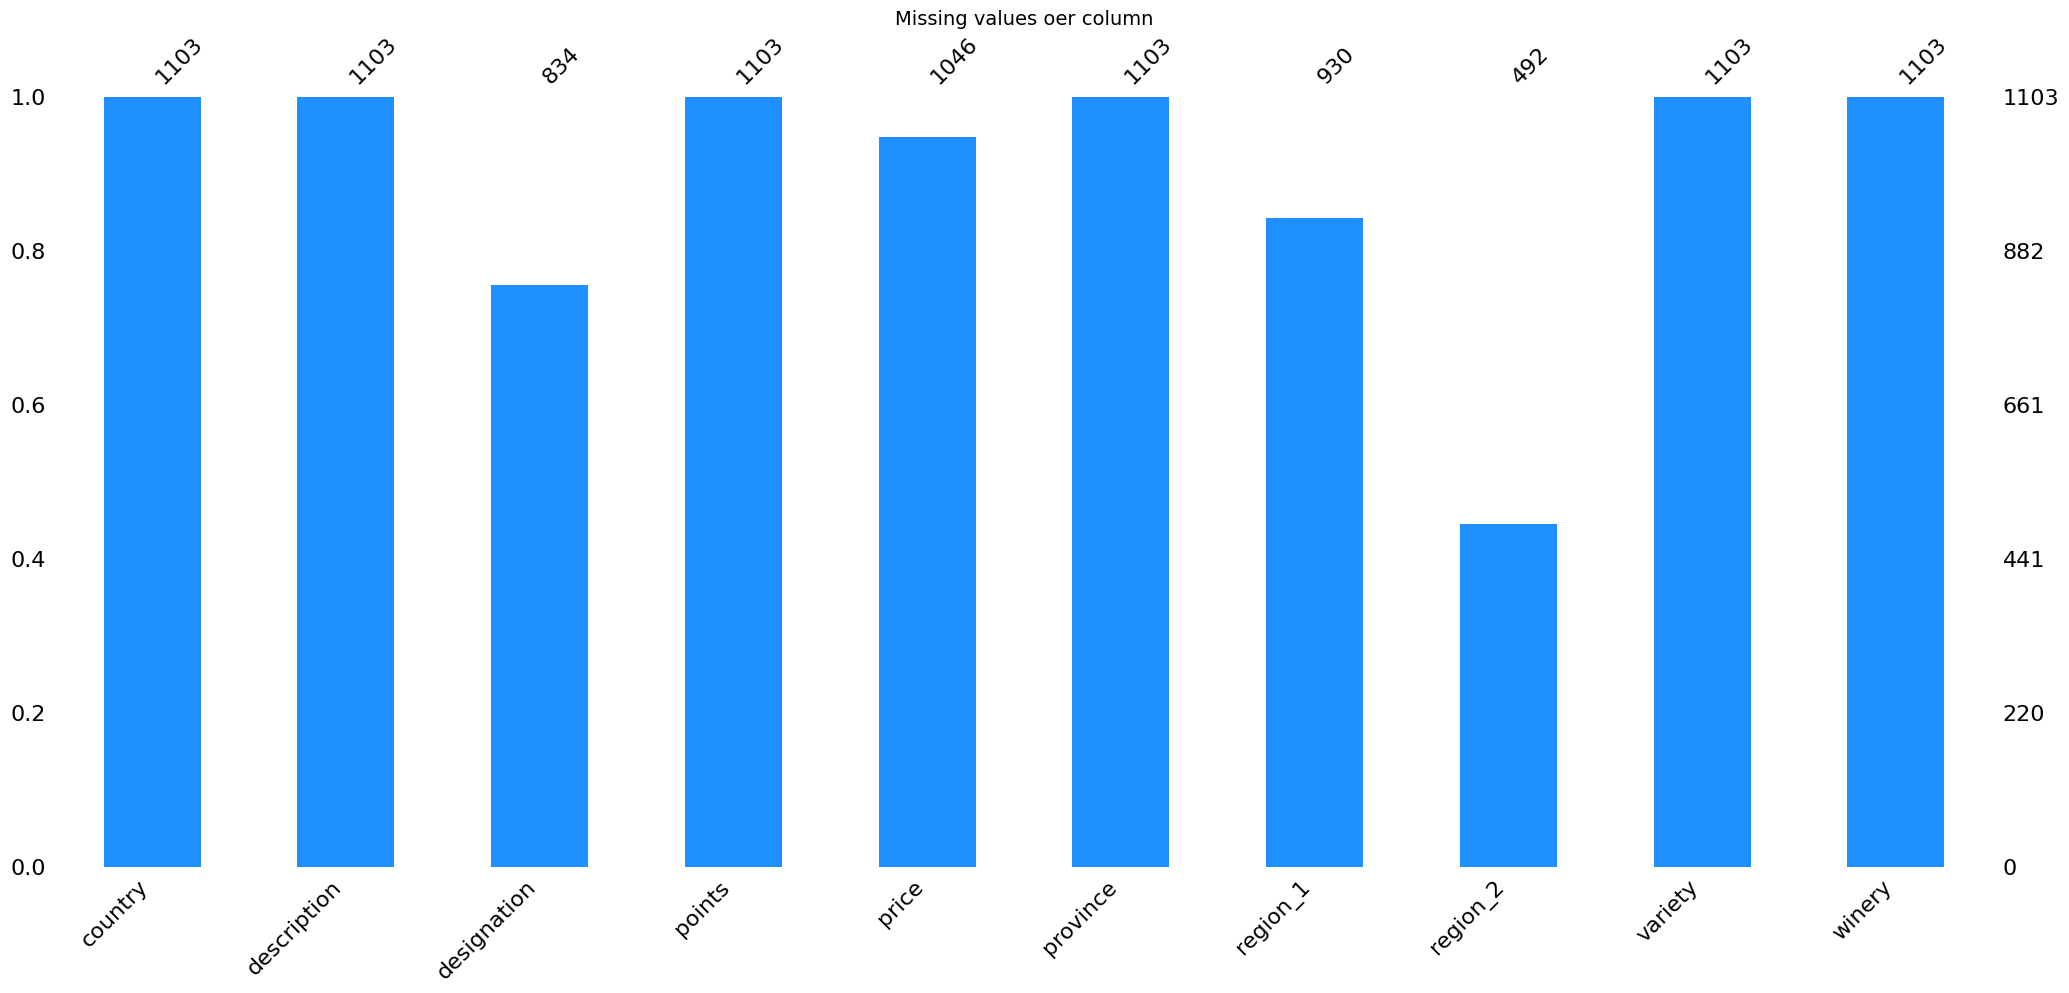

In [13]:
# Bar chart of missing values
ax = msno.bar(df_wine, color='dodgerblue')
plt.title ('Missing values oer column', fontsize=14)
plt.show()

Approach to handling missing information: 

- Drop region_2 (too many missing values, not critical)
- Impute missing price (57 rows)
- Fill missing designations (269 rows)
- Fill in missing region_1 (173 rows)

In [14]:
# Drop region_2
df_wine = df_wine.drop(['region_2'], axis=1)
df_wine.head()

,country,description,designation,points,price,province,region_1,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selecci√≥n Especial Reserva,96,110.0,Northern Spain,Toro,Tinta de Toro,Bodega Carmen Rodr√≠guez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La B√©gude, named af...",La Br√ªlade,95,66.0,Provence,Bandol,Provence red blend,Domaine de la B√©gude


In [15]:
# Impute missing prices (57 rows)
# As prices are skewed in our case, we will use median for imputaion.
    
df_wine['price'] = df_wine['price'].fillna(df_wine['price'].median())

# Replace missing designations with "Unknown" (269 rows)
df_wine['designation'] = df_wine['designation'].fillna('Unknown')

# Replace missing region_1 with "Unknown" (173 rows)
df_wine['region_1'] = df_wine['region_1'].fillna('Unknown')

# Checking cleaned information
df_wine.isnull().sum()



country        0
description    0
designation    0
points         0
price          0
province       0
region_1       0
variety        0
winery         0
dtype: int64

DATA STORIES AND VISUALISATIONS

1. We will start with examining whether more expensive wines score higher 

Most columns in the wine dataset are categorical, we can still check correlation between the numeric ones: points and price 

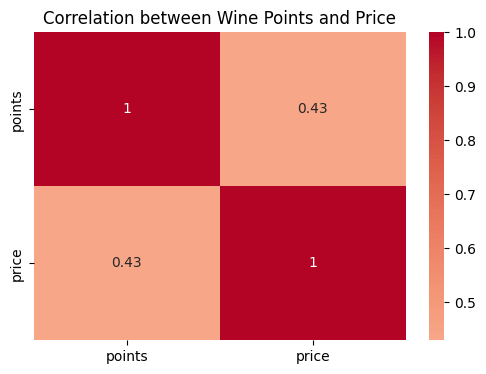

In [17]:

plt.figure(figsize=(6,4))
sns.heatmap(df_wine[['points', 'price']].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation between Wine Points and Price')
plt.show()

The heatmap demonstrates 0.43 - which is moderate positive correlation. 
There is a moderate tendency for more expensive wines to score higher in points. However, price alone does not fully explain quality - there are other factors that matter too. 

2. Next we will examine if:
   - more expensive wines score higher?
   - some countries have higher prices than others?

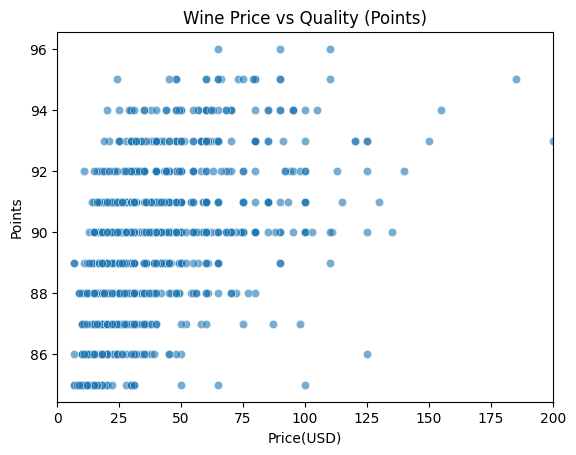

In [35]:
sns.scatterplot(x='price', y='points', data=df_wine, alpha=0.6)
plt.title('Wine Price vs Quality (Points)')
plt.xlabel('Price(USD)')
plt.ylabel('Points')
plt.xlim(0,200)
plt.show()

The scatter plot demonstrates that the highest rated wines are not necessarily are the most expensive.
Most wines cluster around the price range USD20-50 but not exceeding USD100 and an average rating of 90 points.

3. We will now look at quality(points) vs country average price.

In [23]:
# First we aggregate average price and average points for each country 
country_avg = df_wine.groupby('country').agg(
    avg_price=('price', 'mean'),
    avg_points=('points','mean'),
    count=('points', 'size')
).reset_index()
country_avg.head()


,country,avg_price,avg_points,count
0,Argentina,21.360000,87.28,25
1,Australia,42.166667,89.50,6
2,Austria,24.000000,93.00,4
3,Bulgaria,17.600000,88.60,5
4,Canada,33.600000,90.40,5


<function matplotlib.pyplot.show(close=None, block=None)>

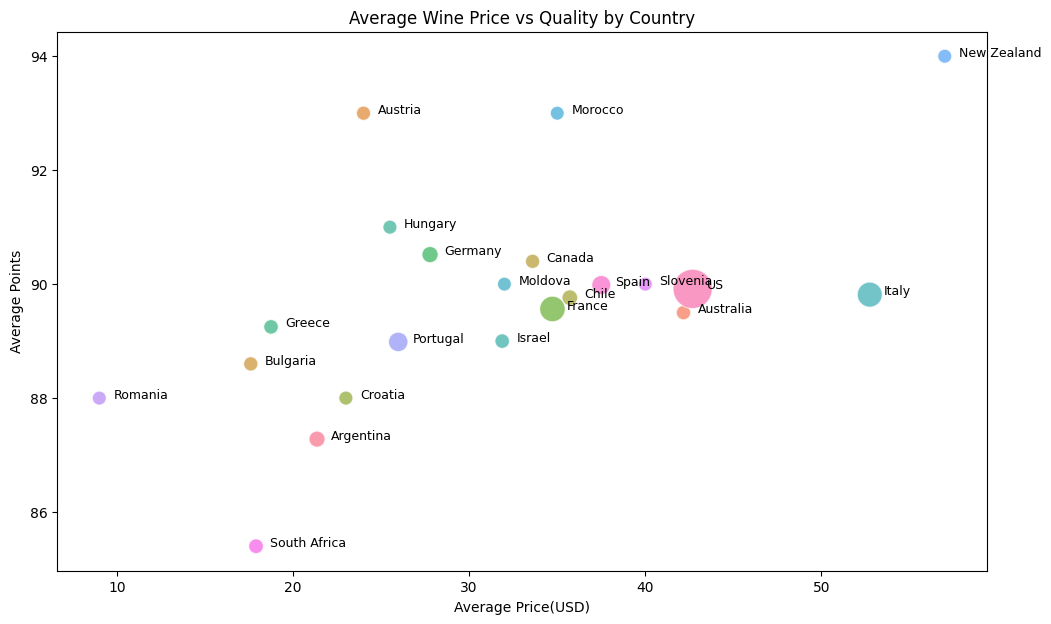

In [36]:
plt.figure(figsize=(12,7))
sns.scatterplot(
    data=country_avg,
    x='avg_price',
    y='avg_points',
    size='count',
    hue='country',
    legend=False,
    alpha=0.7,
    sizes=(100, 800)
    )
for i, row in country_avg.iterrows():
    plt.text(row['avg_price']+0.8,
             row['avg_points'],
             row['country'],
             fontsize=9) 
    
plt.title('Average Wine Price vs Quality by Country')
plt.xlabel('Average Price(USD)')
plt.ylabel('Average Points')
plt.show

Countries with the biggest number of wine reviews are US, France, Italy, Portugal and Spain.
Italy, US and Spain wines demonstrate somewhat higher (however, not significantly) rating around 90, followed by France  and Portugal.
Italian wines tend to be more expensive, followed by US, Spain, France and Portugal. 
Italian average price is around USD 50, whereas Portugal wines are almost two times cheaper. 
US, Spain and France wines average price range is USD 35-45
Overall, Italy wines have the highest ratings and the highest average price among countries with the biggest number of reviews

4. We will now compare wine ratings across categories:
- By country (top producers)
- By grape variety (e.g. Chardonnay, Cabernet Sauvignon, Pinot Noir)

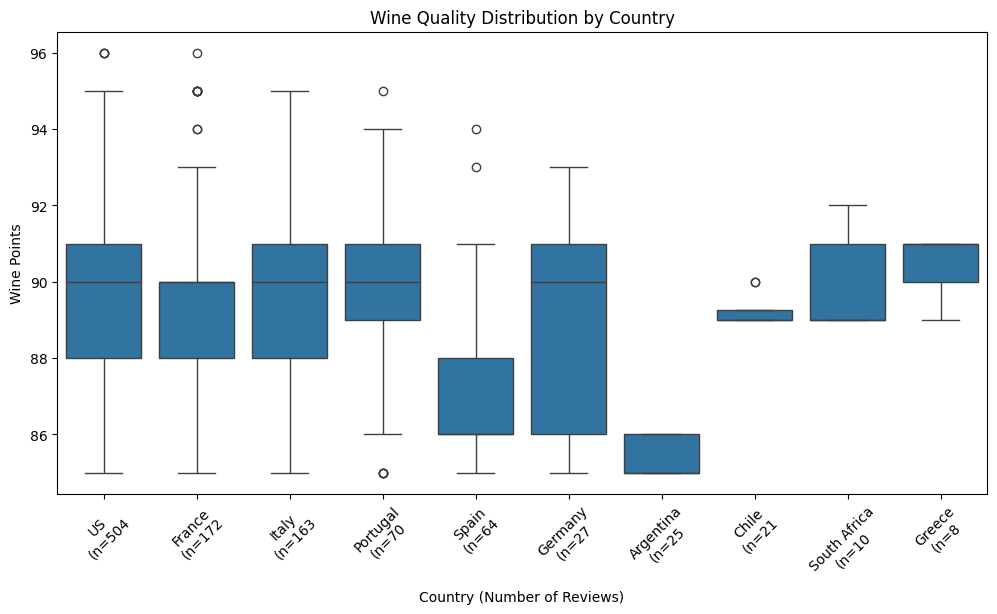

In [42]:
# Top 10 countries by count
top_countries = df_wine['country'].value_counts().head(10)
labels_with_counts = [f'{country}\n(n={count}' for country, count in top_countries.items()]

plt.figure(figsize=(12,6))
sns.boxplot(x='country',
            y='points',
            data=df_wine[df_wine['country'].isin(top_countries.index)])
plt.xticks(ticks=range(len(labels_with_counts)), labels=labels_with_counts, rotation=45)
plt.title('Wine Quality Distribution by Country')
plt.ylabel('Wine Points')
plt.xlabel('Country (Number of Reviews)')
plt.show()
    
                                                                         

US, France, Italy and Portugal wines quality are the highest and range from 95 to a min of 85, whereas Spain wines 
quality is ranged somewhat lower (from 91 to 85)
The biggest number of reviews and therefore the biggest wine producers in the world are US, France and Italy. These countries also possess the highest number of quality reviews.
German wines have a relatively extended quality range compared to other countries. Relatively low number of quality review points (27) spread across 91 to 86.

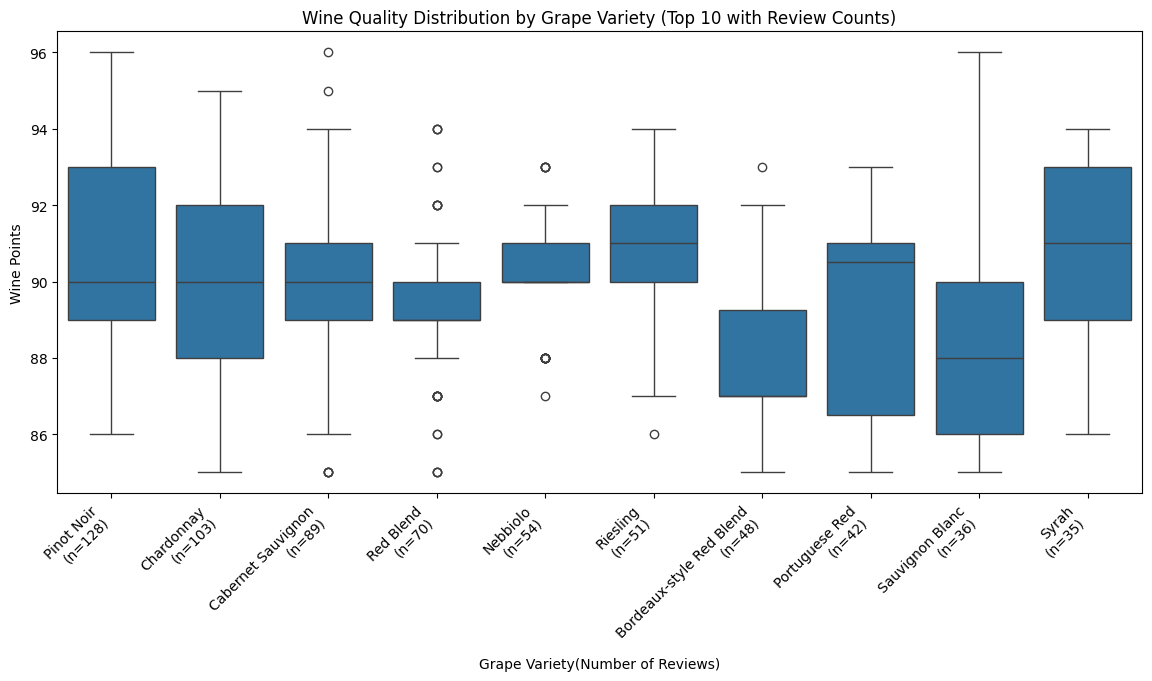

In [47]:
# Lets compare wine ratings by grape variety
top_varieties_counts = df_wine['variety'].value_counts().head(10)
order = top_varieties_counts.index
labels_with_counts = [f'{var}\n(n={count})' for var, count in top_varieties_counts.items()]

plt.figure(figsize=(14,6))
sns.boxplot(
    x='variety',
    y='points',
    data=df_wine[df_wine['variety'].isin(order)],
    order=order)

plt.xticks(ticks=range(len(labels_with_counts)), labels=labels_with_counts, rotation=45, ha='right')
plt.title('Wine Quality Distribution by Grape Variety (Top 10 with Review Counts)')
plt.xlabel('Grape Variety(Number of Reviews)')
plt.ylabel('Wine Points')
plt.show()

Pinot Noir, Chardonnay and Cabernet Sauvignon are mostly wide represented varieties of wines globally with the highest quality. 
Interestingly, some wine quality (like Red Blend and Nebbiolo) have more outliers in both directions than others.
Pinot Noir, Chardonnay and Sauvingnon Blanc represent the highest consistent quality among top wines.


OVERALL TAKEAWAYS
- Price and quality are related, but not conclusively - value wines exist, and not all expensive wines are exceptional.
- France and Italy stand out for consistently high quality, and the USA shows broader diversity with high quality.
- Classic grape varieties dominate both in volume and in reputation, though there is variability within them. 


This report was written by: Olena Manziuk